ADF Statistic: -0.34138151020457563
p-value: 0.9194355530673936
Data is not stationary.
ADF Statistic: -0.34138151020457563
p-value: 0.9194355530673936
Data is not stationary.


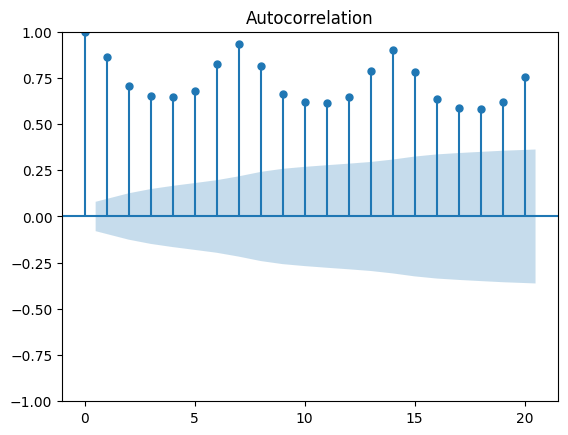

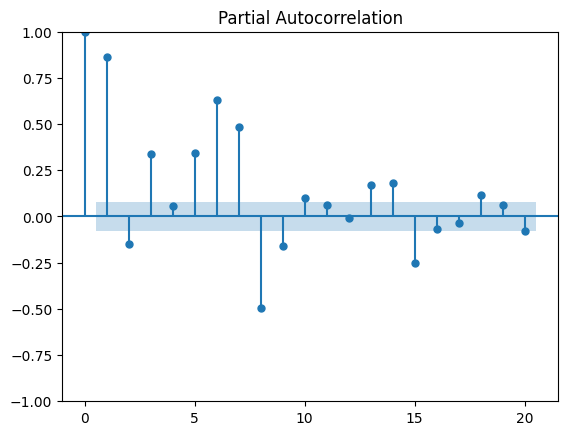

                                     SARIMAX Results                                     
Dep. Variable:                          Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3447.260
Date:                           Fri, 29 Nov 2024   AIC                           6904.521
Time:                                   10:52:38   BIC                           6926.430
Sample:                               11-01-2015   HQIC                          6913.055
                                    - 06-30-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5904      0.027     22.237      0.000       0.538       0.642
ma.L1         -1.0000      6.863     -0.146

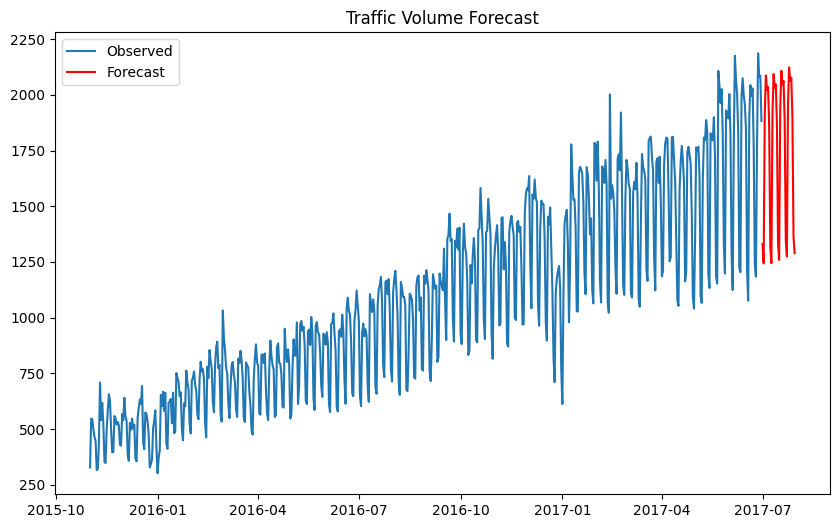

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv('traffic.csv', parse_dates=['DateTime'], index_col='DateTime')

# Keep only the relevant columns
data = data[['Junction', 'Vehicles']]  # Adjust based on your column names

# Filter for one junction (if analyzing one junction at a time)
junction_id = 1
data = data[data['Junction'] == junction_id].drop(columns=['Junction'])

# Step 2: Resample data to daily frequency (if needed)
data = data.resample('D').sum()  # Summing hourly data to daily totals

# Step 3: Check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary.")

check_stationarity(data['Vehicles'])

# Step 4: Differencing (if needed)
if not check_stationarity(data['Vehicles']):
    data['Vehicles_diff'] = data['Vehicles'].diff().dropna()

# Step 5: Plot ACF and PACF
plot_acf(data['Vehicles'].dropna(), lags=20)
plot_pacf(data['Vehicles'].dropna(), lags=20)
plt.show()

# Step 6: Fit a SARIMA model
# Based on ACF/PACF plots, seasonality, and tuning
p, d, q = 1, 1, 1  # Adjust based on analysis
P, D, Q, S = 1, 1, 1, 7  # Weekly seasonality (S=7 for daily data)

model = SARIMAX(data['Vehicles'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, S),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)
print(model_fit.summary())

# Step 7: Forecasting
forecast_steps = 30  # Predict the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Step 8: Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Vehicles'], label="Observed")
plt.plot(forecast.index, forecast, label="Forecast", color='red')
plt.legend()
plt.title("Traffic Volume Forecast")
plt.show()